Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
import logging
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S', level=logging.INFO)

In [2]:
def onemax(individual):
    if individual.ndim == 1:
        return np.sum(individual)
    else:
        return np.sum(individual, axis=1)

def twomax(individual):
    if individual.ndim == 1:
        sum_ = np.sum(individual)
        return max(sum_, individual.shape[0]-sum_)
    else:
        sum_ = np.sum(individual, axis=1)
        return np.maximum(sum_, individual.shape[1]-sum_)


In [3]:
GENOME_LENGTH = 100
POPULATION_SIZE = 20
OFFSPRING_SIZE = 50
TOURNAMEN_SIZE = 2
MUTATION_PROBABILITY = 1/GENOME_LENGTH

In [4]:
def parent_selection(population):
    tournament = population[np.random.randint(0, len(population), size=(TOURNAMEN_SIZE,))]
    fitness = onemax(tournament)
    return np.copy(tournament[fitness.argmax()])

def xover(parent1, parent2):
    return np.array([p1 if r < .5 else p2 
        for p1, p2, r in zip(parent1, parent2, np.random.random(GENOME_LENGTH))])

def mutate(parent):
    offspring = np.copy(parent)
    while np.random.random() < MUTATION_PROBABILITY:
        i = np.random.randint(0, GENOME_LENGTH)
        offspring[i] = not parent[i]
    return offspring

In [5]:
population = np.array(np.random.random((POPULATION_SIZE, GENOME_LENGTH)) < .5)

generations = 1
history = list()
while onemax(population[0]) < GENOME_LENGTH:
    generations += 1
    offspring = list()
    for o in range(OFFSPRING_SIZE):
        p1, p2 = parent_selection(population), parent_selection(population)
        offspring.append(mutate(xover(p1, p2)))
    offspring = np.array(offspring)
    #fitness = onemax(offspring)
    fitness = twomax(offspring)
    history += fitness.tolist()
    population = np.copy(offspring[fitness.argsort()[::-1]][:POPULATION_SIZE])

print(f"Problem solved in {generations:,} generations (fitness={onemax(population[0])})\n{population[0]}")

Problem solved in 318 generations (fitness=100)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


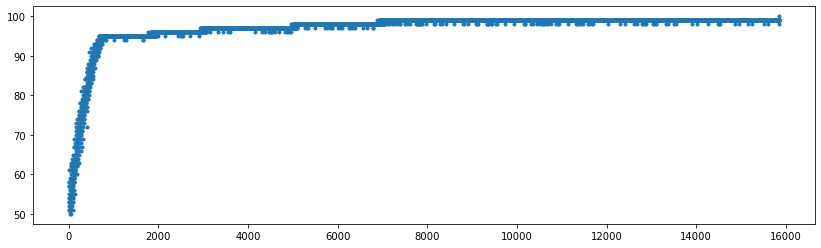

In [6]:
history = np.array(history)
plt.figure(figsize=(14, 4)) 
plt.plot(history, '.')